In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

In [2]:
N = 100
d = norm(8, 1)
Xᴺ = d.rvs(size=N)

# F̂, Xᴺ は Julia から生成した記号をコピペした.
def F̂(x):
    return np.mean(Xᴺ <= x)
F̂=np.vectorize(F̂)

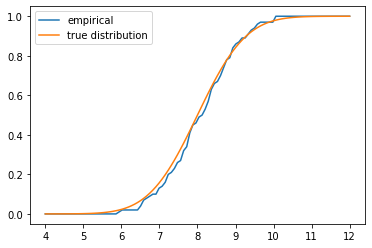

In [3]:
xs = np.linspace(4, 12, 100)
ys = norm.cdf(xs, loc=8, scale=1)
# これブロードキャストさせたいんだけれどん
plt.plot(xs, F̂(xs), label="empirical")
plt.plot(xs, ys, label="true distribution")
plt.legend()

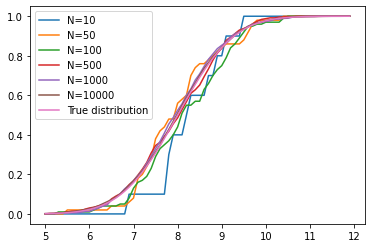

In [4]:
fig,ax=plt.subplots()
xs = np.arange(5, 12, 0.1)
for N in [10, 50, 100, 500, 1000, 10000]:
    d = norm(8, 1)
    Xᴺ = d.rvs(size=N)
    # Remark: F̂=np.vectorize(lambda x:sum(Xᴺ <= x)/N) は非常に遅い
    F̂=np.vectorize(lambda x:np.mean(Xᴺ <= x))
    ys = F̂(xs)
    ax.plot(xs, ys,label=f"N={N}")

ax.plot(xs, norm(8,1).cdf(xs), label="True distribution")
plt.legend()

In [5]:
N = 100000
d = norm(8,1)
Xᴺ = d.rvs(size=N)
def F̂(x):
    return np.mean(Xᴺ <= x)
F̂ = np.vectorize(F̂)
domcdf = np.linspace(4,12,num=10000)
imcdf = F̂(domcdf)

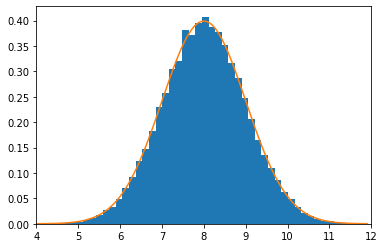

In [6]:
xs = []
M = len(domcdf)
for trial in range(100000):
    y = np.random.uniform()
    idx = np.searchsorted(imcdf, y)
    if idx < M:
        x = domcdf[idx]
        xs.append(x)

plt.xlim([4,12])
plt.hist(xs, density=True,bins=50)
xs = sorted(xs) # d.pdf の描画のために
plt.plot(xs, d.pdf(xs))